# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 38
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I like the British Airways ...
1,✅ Trip Verified | I have come to boarding and...
2,✅ Trip Verified | Stinking nappies being chang...
3,✅ Trip Verified | Worst service ever. Lost bag...
4,✅ Trip Verified | BA 246 21JAN 2023 Did not a...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## 1. Data Cleaning

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df

,reviews
0,✅ Trip Verified | I like the British Airways ...
1,✅ Trip Verified | I have come to boarding and...
2,✅ Trip Verified | Stinking nappies being chang...
3,✅ Trip Verified | Worst service ever. Lost bag...
4,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
...,...
3738,YYZ to LHR - July 2012 - I flew overnight in p...
3739,LHR to HAM. Purser addresses all club passenge...
3740,My son who had worked for British Airways urge...
3741,London City-New York JFK via Shannon on A318 b...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3743 non-null   object
dtypes: object(1)
memory usage: 29.4+ KB


In [8]:
df[['Verification Status', 'review']] = df['reviews'].str.split('|', n=1, expand=True)

df['Verification Status'] = df['Verification Status'].str.strip()
df['review'] = df['review'].str.strip()
df.head()

,reviews,Verification Status,review
0,✅ Trip Verified | I like the British Airways ...,✅ Trip Verified,I like the British Airways World Traveller Plu...
1,✅ Trip Verified | I have come to boarding and...,✅ Trip Verified,I have come to boarding and my cabin luggage w...
2,✅ Trip Verified | Stinking nappies being chang...,✅ Trip Verified,Stinking nappies being changed in business cab...
3,✅ Trip Verified | Worst service ever. Lost bag...,✅ Trip Verified,Worst service ever. Lost baggage because of de...
4,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,✅ Trip Verified,BA 246 21JAN 2023 Did not appreciate the unpro...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              3743 non-null   object
 1   Verification Status  3743 non-null   object
 2   review               2220 non-null   object
dtypes: object(3)
memory usage: 87.9+ KB


In [10]:
df['Verification Status'].value_counts()

Verification Status
✅ Trip Verified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## 2. Verified Data

In [11]:
filtered_df = df[df['Verification Status'].isin(['✅ Trip Verified', ' ✅ Verified Review','✅ Verified Review'])]

In [12]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 2392
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              1955 non-null   object
 1   Verification Status  1955 non-null   object
 2   review               1955 non-null   object
dtypes: object(3)
memory usage: 61.1+ KB


In [13]:
filtered_df = filtered_df.drop('reviews', axis=1)

In [14]:
filtered_df['Verification Status'].value_counts()

Verification Status
✅ Trip Verified      1185
✅ Verified Review     770
Name: count, dtype: int64

In [15]:
filtered_df = filtered_df.applymap(lambda x: x.replace('✅ ', '') if pd.notna(x) else x)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25324\310665658.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_df = filtered_df.applymap(lambda x: x.replace('✅ ', '') if pd.notna(x) else x)


In [16]:
filtered_df.head()

,Verification Status,review
0,Trip Verified,I like the British Airways World Traveller Plu...
1,Trip Verified,I have come to boarding and my cabin luggage w...
2,Trip Verified,Stinking nappies being changed in business cab...
3,Trip Verified,Worst service ever. Lost baggage because of de...
4,Trip Verified,BA 246 21JAN 2023 Did not appreciate the unpro...


### a. Remove Punctuations

In [17]:
import string

punctuations = string.punctuation
filtered_df['review'] = filtered_df['review'].apply(lambda x: ''.join([char for char in x if char not in punctuations]))
filtered_df.head()

,Verification Status,review
0,Trip Verified,I like the British Airways World Traveller Plu...
1,Trip Verified,I have come to boarding and my cabin luggage w...
2,Trip Verified,Stinking nappies being changed in business cab...
3,Trip Verified,Worst service ever Lost baggage because of del...
4,Trip Verified,BA 246 21JAN 2023 Did not appreciate the unpro...


In [18]:
import re

def replace(text):            # Define a function to clean the text
    text = re.sub(r'[^A-Za-z]+', ' ', str(text)) # Replaces all special characters and numericals with blanks and leaving the alphabets
    return text
# Cleaning the text in the review column
filtered_df['review']= filtered_df["review"].apply(replace)
filtered_df.head()

,Verification Status,review
0,Trip Verified,I like the British Airways World Traveller Plu...
1,Trip Verified,I have come to boarding and my cabin luggage w...
2,Trip Verified,Stinking nappies being changed in business cab...
3,Trip Verified,Worst service ever Lost baggage because of del...
4,Trip Verified,BA JAN Did not appreciate the unprofessional a...


### b. Lowercase Data

In [19]:
filtered_df['review'] = filtered_df['review'].str.lower()
filtered_df.head()

,Verification Status,review
0,Trip Verified,i like the british airways world traveller plu...
1,Trip Verified,i have come to boarding and my cabin luggage w...
2,Trip Verified,stinking nappies being changed in business cab...
3,Trip Verified,worst service ever lost baggage because of del...
4,Trip Verified,ba jan did not appreciate the unprofessional a...


### c. Remove Numerical

In [20]:
filtered_df['review'] = filtered_df['review'].str.replace('\d', '')
filtered_df.head()

,Verification Status,review
0,Trip Verified,i like the british airways world traveller plu...
1,Trip Verified,i have come to boarding and my cabin luggage w...
2,Trip Verified,stinking nappies being changed in business cab...
3,Trip Verified,worst service ever lost baggage because of del...
4,Trip Verified,ba jan did not appreciate the unprofessional a...


### d. Tokenization

In [21]:
filtered_dt = filtered_df.copy()
filtered_dt.head()

,Verification Status,review
0,Trip Verified,i like the british airways world traveller plu...
1,Trip Verified,i have come to boarding and my cabin luggage w...
2,Trip Verified,stinking nappies being changed in business cab...
3,Trip Verified,worst service ever lost baggage because of del...
4,Trip Verified,ba jan did not appreciate the unprofessional a...


In [22]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
from textblob import TextBlob
filtered_dt['review'] = filtered_dt['review'].apply(lambda x: TextBlob(x).words)

In [24]:
filtered_dt["review"].head()

0    [i, like, the, british, airways, world, travel...
1    [i, have, come, to, boarding, and, my, cabin, ...
2    [stinking, nappies, being, changed, in, busine...
3    [worst, service, ever, lost, baggage, because,...
4    [ba, jan, did, not, appreciate, the, unprofess...
Name: review, dtype: object

### e. Remove Stopwords

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
sw = set(stopwords.words('english'))
filtered_dt['review'] = filtered_dt['review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
filtered_dt['review'].head()

0    ['i', 'like', 'the', 'british', 'airways', 'wo...
1    ['i', 'have', 'come', 'to', 'boarding', 'and',...
2    ['stinking', 'nappies', 'being', 'changed', 'i...
3    ['worst', 'service', 'ever', 'lost', 'baggage'...
4    ['ba', 'jan', 'did', 'not', 'appreciate', 'the...
Name: review, dtype: object

In [27]:
print(sw)

{"isn't", "weren't", 'if', 'this', 'their', 'should', "doesn't", 'all', 'she', 'where', 'hasn', 'our', 'there', 'that', 'when', "wasn't", 's', 'same', 'y', 'very', 'most', 'some', 'weren', 'he', 'theirs', 'me', 'his', 'those', 'both', "hadn't", 'again', 'will', 'herself', 'further', 'didn', 'nor', 'during', 'mightn', 'doesn', 'shan', 'did', "haven't", 'a', 'but', "don't", 'out', 'so', 'o', 'him', "should've", 'how', "it's", 'in', 'now', 'won', 'until', 'wasn', 'because', 'too', 'is', 'don', 'couldn', 'below', 'of', "mightn't", 'about', 'itself', 'ours', 'aren', 'at', 'and', 'be', "you'd", 'hers', 'down', 'just', "she's", 'am', 'haven', 'are', 'no', 'between', 'whom', 'why', 'by', 'himself', 'against', 'your', 've', 'not', "didn't", "wouldn't", 'before', 'hadn', 'yours', 'having', 'what', "hasn't", 'was', 'more', 'they', 'other', 'each', 'we', 'which', 'up', 'after', 'or', 'wouldn', 'than', 'have', 'the', 'can', 'd', 'ma', "you'll", 'on', 'll', 'doing', 'from', "couldn't", 'you', 'yours

In [28]:
filtered_dt['review'] = filtered_dt['review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x.lower() not in sw))
filtered_dt['review'].head()

0    ['i', 'like', 'the', 'british', 'airways', 'wo...
1    ['i', 'have', 'come', 'to', 'boarding', 'and',...
2    ['stinking', 'nappies', 'being', 'changed', 'i...
3    ['worst', 'service', 'ever', 'lost', 'baggage'...
4    ['ba', 'jan', 'did', 'not', 'appreciate', 'the...
Name: review, dtype: object

In [29]:
from textblob import Word, TextBlob
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### f. Lemmatization

In [30]:
# Fungsi untuk lemmatisasi teks menggunakan TextBlob
def lemmatize_text(text):
    blob = TextBlob(text)
    lemmatized = ' '.join([word.lemmatize() for word in blob.words])
    return lemmatized

filtered_dt['review'] = filtered_dt['review'].apply(lemmatize_text)

In [31]:
filtered_dt.head(10)

,Verification Status,review
0,Trip Verified,i 'like 'the 'british 'airways 'world 'travell...
1,Trip Verified,i 'have 'come 'to 'boarding 'and 'my 'cabin 'l...
2,Trip Verified,'stinking 'nappies 'being 'changed 'in 'busine...
3,Trip Verified,'worst 'service 'ever 'lost 'baggage 'because ...
4,Trip Verified,'ba 'jan 'did 'not 'appreciate 'the 'unprofess...
5,Trip Verified,'not a 'great 'experience i 'could 'not 'check...
9,Trip Verified,'the 'plane 'was 'extremely 'dirty 'with 'choc...
11,Trip Verified,'overall 'very 'satisfied 'ground 'staff 'memb...
12,Trip Verified,'as 'always 'when i 'fly 'ba 'it 'was a 'total...
13,Trip Verified,'first 'time 'using 'ba 'business 'class 'but ...


In [32]:
char_del = "'"
filtered_dt['review'] = filtered_dt['review'].apply(lambda x: ''.join([char for char in x if char not in char_del]))
filtered_dt.head()

,Verification Status,review
0,Trip Verified,i like the british airways world traveller plu...
1,Trip Verified,i have come to boarding and my cabin luggage w...
2,Trip Verified,stinking nappies being changed in business cab...
3,Trip Verified,worst service ever lost baggage because of del...
4,Trip Verified,ba jan did not appreciate the unprofessional a...


In [33]:
filtered_dt.head(10)

,Verification Status,review
0,Trip Verified,i like the british airways world traveller plu...
1,Trip Verified,i have come to boarding and my cabin luggage w...
2,Trip Verified,stinking nappies being changed in business cab...
3,Trip Verified,worst service ever lost baggage because of del...
4,Trip Verified,ba jan did not appreciate the unprofessional a...
5,Trip Verified,not a great experience i could not check in on...
9,Trip Verified,the plane was extremely dirty with chocolate s...
11,Trip Verified,overall very satisfied ground staff member at ...
12,Trip Verified,as always when i fly ba it was a total shamble...
13,Trip Verified,first time using ba business class but we were...


### g. Sentiment Analysis using TextBlob

In [34]:
from textblob import TextBlob

# Fungsi untuk menganalisis sentimen menggunakan TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Menggunakan nilai polaritas untuk menentukan sentimen
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

# Menambahkan kolom 'sentiment' ke dalam DataFrame
filtered_dt['sentiment'] = filtered_dt['review'].apply(analyze_sentiment)

print(filtered_dt[['review', 'sentiment']].head())

                                              review sentiment
0  i like the british airways world traveller plu...  positive
1  i have come to boarding and my cabin luggage w...  positive
2  stinking nappies being changed in business cab...  positive
3  worst service ever lost baggage because of del...  negative
4  ba jan did not appreciate the unprofessional a...  positive


In [35]:
sentiment_counts = filtered_dt['sentiment'].value_counts()
sentiment_counts

sentiment
positive    1287
negative     657
neutral       11
Name: count, dtype: int64

### h. Data Visualization

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
# Gabungkan semua ulasan menjadi satu string
all_reviews = ' '.join(filtered_dt['review'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

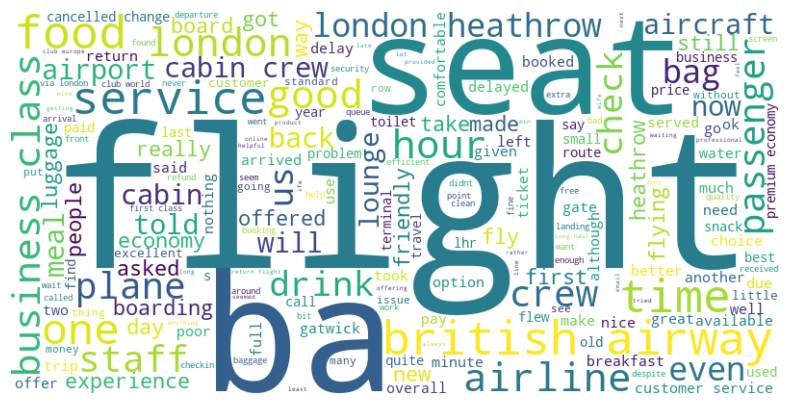

In [38]:
# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25324\3153477400.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=filtered_dt, palette='Set2')


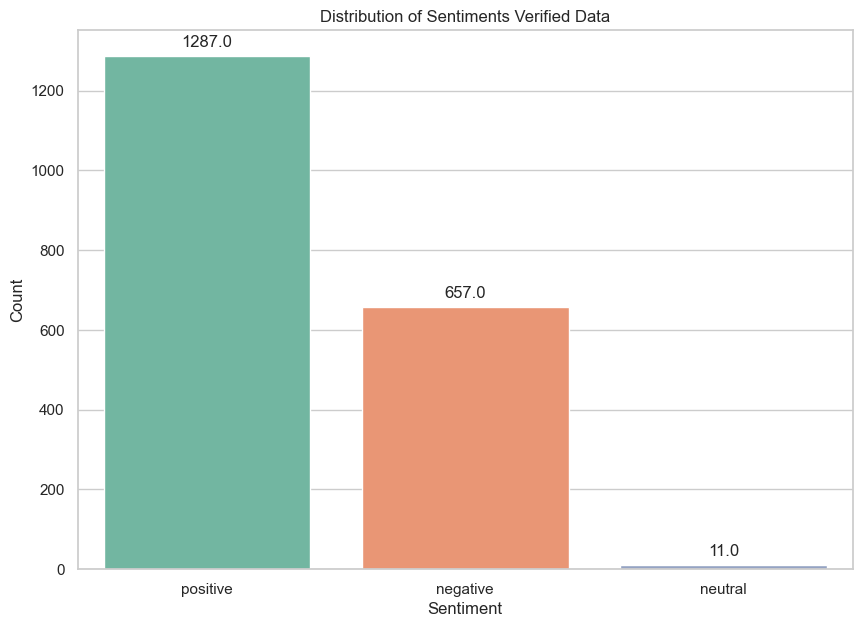

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema dan gaya plot Seaborn (opsional)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))

# Plot grafik batang untuk distribusi sentimen
ax = sns.countplot(x='sentiment', data=filtered_dt, palette='Set2')

# Tambahkan label dan judul
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments Verified Data')

# Tambahkan keterangan detil angka data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.show()

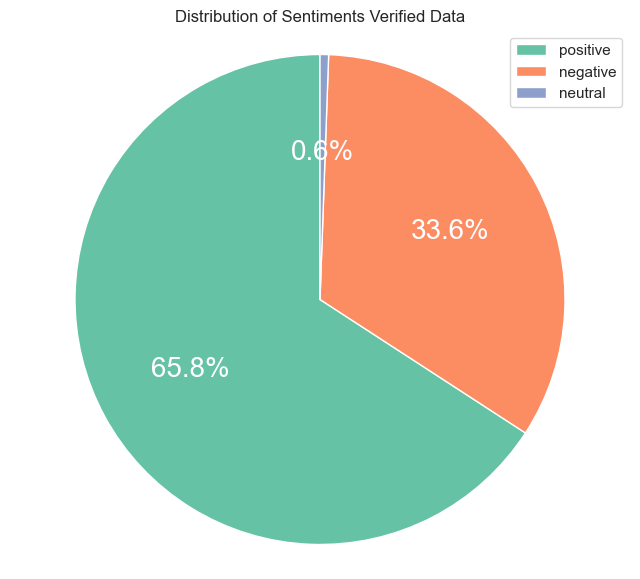

In [89]:
plt.figure(figsize=(8, 7))

# Hitung jumlah ulasan untuk setiap sentimen
sentiment_counts = filtered_dt['sentiment'].value_counts()

# Plot grafik pie
wedges, texts, autotexts = plt.pie(sentiment_counts, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, textprops=dict(color="w"))

# Tambahkan label dan judul
plt.axis('equal')  # Membuat lingkaran agar tampak seperti lingkaran
plt.title('Distribution of Sentiments Verified Data')

# Tambahkan legenda di luar pie chart
plt.legend(sentiment_counts.index, loc='upper right', bbox_to_anchor=(1, 1))

# Atur posisi dan properti teks persentase
for text, autotext in zip(texts, autotexts):
    text.set(color='black')  # Warna teks label
    autotext.set(color='white')  # Warna teks persentase
    autotext.set_size(20)  # Ukuran teks persentase

# Tampilkan plot
plt.show()


## 3. Unverified Data

In [41]:
filtered_dt

,Verification Status,review,sentiment
0,Trip Verified,i like the british airways world traveller plu...,positive
1,Trip Verified,i have come to boarding and my cabin luggage w...,positive
2,Trip Verified,stinking nappies being changed in business cab...,positive
3,Trip Verified,worst service ever lost baggage because of del...,negative
4,Trip Verified,ba jan did not appreciate the unprofessional a...,positive
...,...,...,...
2387,Verified Review,istanbul to london heathrow with british airwa...,positive
2388,Verified Review,london heathrow to houston on british airways ...,positive
2389,Verified Review,we have flown with british airways over times ...,positive
2390,Verified Review,british airways from seattle to johannesburg v...,positive


In [42]:
filtered_dt.to_csv('verfied_sentiment_score.csv')

In [43]:
unverif_filtered_df = df[df['Verification Status'].isin(['Not Verified','❎ Not Verified', '❎ Unverified'])]

In [44]:
unverif_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 6 to 1903
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              263 non-null    object
 1   Verification Status  263 non-null    object
 2   review               263 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [45]:
unverif_filtered_df = unverif_filtered_df.drop('reviews', axis=1)
unverif_filtered_df['Verification Status'].value_counts()

Verification Status
Not Verified      238
❎ Unverified       20
❎ Not Verified      5
Name: count, dtype: int64

In [46]:
unverif_filtered_df = unverif_filtered_df.applymap(lambda x: x.replace('❎ ', '') if pd.notna(x) else x)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25324\2424958105.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  unverif_filtered_df = unverif_filtered_df.applymap(lambda x: x.replace('❎ ', '') if pd.notna(x) else x)


In [47]:
unverif_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 6 to 1903
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  263 non-null    object
 1   review               263 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [48]:
unverif_filtered_df.head()

,Verification Status,review
6,Not Verified,I was excited to fly BA as I'd not travelled w...
7,Not Verified,I just want to warn everyone of the worst cust...
8,Not Verified,Paid for business class travelling Cairo to Lo...
10,Not Verified,"Overall journey wasn’t bad however at the end,..."
14,Not Verified,Extremely rude ground service. We were non-rev...


### a. Remove Punctuations

In [49]:
unverif_filtered_df['review'] = unverif_filtered_df['review'].apply(lambda x: ''.join([char for char in x if char not in punctuations]))
unverif_filtered_df.head()

,Verification Status,review
6,Not Verified,I was excited to fly BA as Id not travelled wi...
7,Not Verified,I just want to warn everyone of the worst cust...
8,Not Verified,Paid for business class travelling Cairo to Lo...
10,Not Verified,Overall journey wasn’t bad however at the end ...
14,Not Verified,Extremely rude ground service We were nonrev f...


In [50]:
unverif_filtered_df['review']= unverif_filtered_df["review"].apply(replace)
unverif_filtered_df.head()

,Verification Status,review
6,Not Verified,I was excited to fly BA as Id not travelled wi...
7,Not Verified,I just want to warn everyone of the worst cust...
8,Not Verified,Paid for business class travelling Cairo to Lo...
10,Not Verified,Overall journey wasn t bad however at the end ...
14,Not Verified,Extremely rude ground service We were nonrev f...


### b. Lowercase Data

In [51]:
unverif_filtered_df['review'] = unverif_filtered_df['review'].str.lower()
unverif_filtered_df.head()

,Verification Status,review
6,Not Verified,i was excited to fly ba as id not travelled wi...
7,Not Verified,i just want to warn everyone of the worst cust...
8,Not Verified,paid for business class travelling cairo to lo...
10,Not Verified,overall journey wasn t bad however at the end ...
14,Not Verified,extremely rude ground service we were nonrev f...


### c. Remove Numerical

In [52]:
unverif_filtered_df['review'] = unverif_filtered_df['review'].str.replace('\d', '')
unverif_filtered_df.head()

,Verification Status,review
6,Not Verified,i was excited to fly ba as id not travelled wi...
7,Not Verified,i just want to warn everyone of the worst cust...
8,Not Verified,paid for business class travelling cairo to lo...
10,Not Verified,overall journey wasn t bad however at the end ...
14,Not Verified,extremely rude ground service we were nonrev f...


### d. Tokenization

In [53]:
unverif_filtered_dt = unverif_filtered_df.copy()
unverif_filtered_dt.head()

,Verification Status,review
6,Not Verified,i was excited to fly ba as id not travelled wi...
7,Not Verified,i just want to warn everyone of the worst cust...
8,Not Verified,paid for business class travelling cairo to lo...
10,Not Verified,overall journey wasn t bad however at the end ...
14,Not Verified,extremely rude ground service we were nonrev f...


In [54]:
unverif_filtered_dt['review'] = unverif_filtered_dt['review'].apply(lambda x: TextBlob(x).words)
unverif_filtered_dt["review"].head()

6     [i, was, excited, to, fly, ba, as, id, not, tr...
7     [i, just, want, to, warn, everyone, of, the, w...
8     [paid, for, business, class, travelling, cairo...
10    [overall, journey, wasn, t, bad, however, at, ...
14    [extremely, rude, ground, service, we, were, n...
Name: review, dtype: object

### e. Remove Stopwords

In [55]:
unverif_filtered_dt['review'] = unverif_filtered_dt['review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
unverif_filtered_dt['review'].head()

6     ['i', 'was', 'excited', 'to', 'fly', 'ba', 'as...
7     ['i', 'just', 'want', 'to', 'warn', 'everyone'...
8     ['paid', 'for', 'business', 'class', 'travelli...
10    ['overall', 'journey', 'wasn', 't', 'bad', 'ho...
14    ['extremely', 'rude', 'ground', 'service', 'we...
Name: review, dtype: object

### f. Lemmatization

In [56]:
unverif_filtered_dt['review'] = unverif_filtered_dt['review'].apply(lemmatize_text)
unverif_filtered_dt['review'].head()

6     i 'was 'excited 'to 'fly 'ba 'as 'id 'not 'tra...
7     i 'just 'want 'to 'warn 'everyone 'of 'the 'wo...
8     'paid 'for 'business 'class 'travelling 'cairo...
10    'overall 'journey 'wasn 't 'bad 'however 'at '...
14    'extremely 'rude 'ground 'service 'we 'were 'n...
Name: review, dtype: object

In [57]:
unverif_filtered_dt['review'] = unverif_filtered_dt['review'].apply(lambda x: ''.join([char for char in x if char not in char_del]))
unverif_filtered_dt.head(10)

,Verification Status,review
6,Not Verified,i was excited to fly ba as id not travelled wi...
7,Not Verified,i just want to warn everyone of the worst cust...
8,Not Verified,paid for business class travelling cairo to lo...
10,Not Verified,overall journey wasn t bad however at the end ...
14,Not Verified,extremely rude ground service we were nonrev f...
19,Not Verified,this review is for lhrsydlhr ba and ba busines...
21,Not Verified,overall not bad staff look tired and overworke...
24,Not Verified,beware ba dont provide any refund due to a ver...
26,Not Verified,all of our flights were fine in terms of comfo...
44,Not Verified,boarded on time but it took ages to get to the...


### g. Sentiment Analysis using TextBlob

In [83]:
# Menambahkan kolom 'sentiment' ke dalam DataFrame
unverif_filtered_dt['sentiment'] = unverif_filtered_dt['review'].apply(analyze_sentiment)

print(unverif_filtered_dt[['review', 'sentiment']].head())

                                               review sentiment
6   i was excited to fly ba as id not travelled wi...  positive
7   i just want to warn everyone of the worst cust...  positive
8   paid for business class travelling cairo to lo...  negative
10  overall journey wasn t bad however at the end ...  negative
14  extremely rude ground service we were nonrev f...  negative


In [84]:
unverif_sentiment_counts = unverif_filtered_dt['sentiment'].value_counts()
unverif_sentiment_counts

sentiment
positive    170
negative     91
neutral       2
Name: count, dtype: int64

### h. Data Visualization

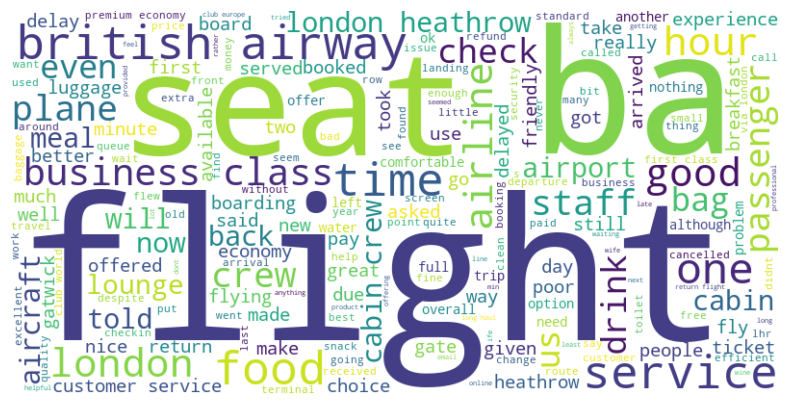

In [85]:
unverif_all_reviews = ' '.join(unverif_filtered_dt['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25324\639356037.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=unverif_filtered_dt, palette='Set2')


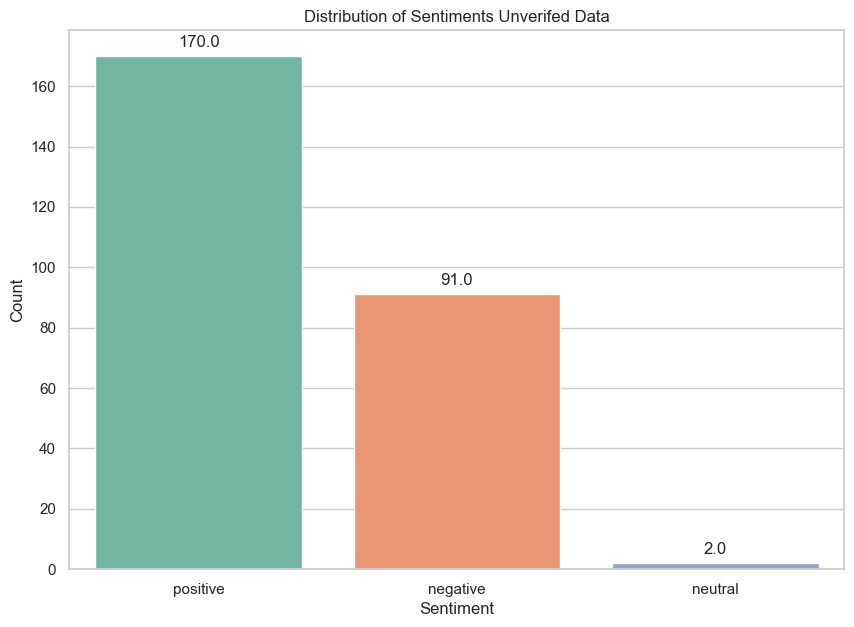

In [91]:
# Set tema dan gaya plot Seaborn (opsional)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))

# Plot grafik batang untuk distribusi sentimen
ax = sns.countplot(x='sentiment', data=unverif_filtered_dt, palette='Set2')

# Tambahkan label dan judul
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments Unverifed Data')

# Tambahkan keterangan detil angka data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.show()

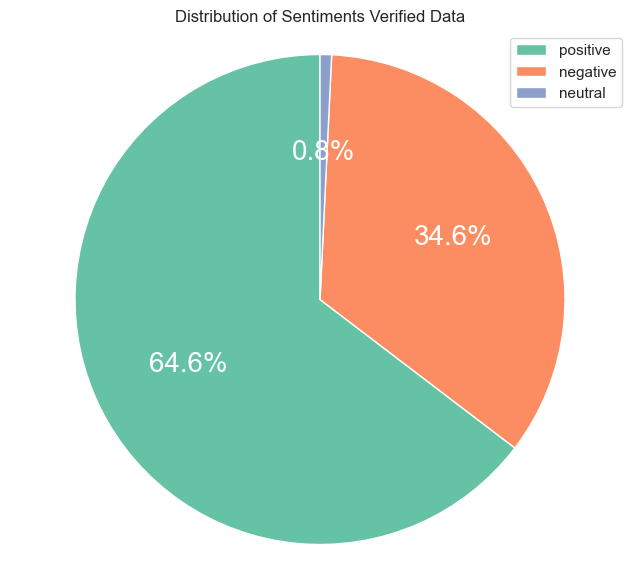

In [88]:
plt.figure(figsize=(8, 7))

# Hitung jumlah ulasan untuk setiap sentimen
sentiment_counts = unverif_filtered_dt['sentiment'].value_counts()

# Plot grafik pie
wedges, texts, autotexts = plt.pie(sentiment_counts, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, textprops=dict(color="w"))

# Tambahkan label dan judul
plt.axis('equal')  # Membuat lingkaran agar tampak seperti lingkaran
plt.title('Distribution of Sentiments Verified Data')

# Tambahkan legenda di luar pie chart
plt.legend(sentiment_counts.index, loc='upper right', bbox_to_anchor=(1, 1))

# Atur posisi dan properti teks persentase
for text, autotext in zip(texts, autotexts):
    text.set(color='black')  # Warna teks label
    autotext.set(color='white')  # Warna teks persentase
    autotext.set_size(20)  # Ukuran teks persentase

# Tampilkan plot
plt.show()
